In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from IPython.display import Image
import folium
from folium import IFrame
from folium.plugins import MarkerCluster
from folium import plugins
from datetime import datetime
import datetime as dt
import json
from scipy import stats

import os

In [3]:
path="/content/drive/MyDrive/Project-2024/NYC_PM.csv"

In [4]:
NYC_PM = pd.read_csv(path)
NYC_PM.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,0,0,23.7,57.3,4.508813
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,0,0,23.7,57.8,5.462420
2,NYCP2_CS01A,1631277313,40.847649,-73.869362,40,1,1,0,0,1,...,0,0,0,0,0,0,0,23.7,57.8,5.154881
3,NYCP2_CS01A,1631277318,40.847649,-73.869362,26,1,0,0,0,0,...,0,0,0,0,0,0,0,23.6,57.6,4.508813
4,NYCP2_CS01A,1631277323,40.847649,-73.869362,44,4,0,1,0,0,...,0,0,0,0,0,0,0,23.6,57.5,5.539503


In [5]:
NYC_PM.shape

(169999, 31)

In [6]:
NYC_PM.dtypes

SensorID        object
time             int64
latitude       float64
longitude      float64
bin0             int64
bin1             int64
bin2             int64
bin3             int64
bin4             int64
bin5             int64
bin6             int64
bin7             int64
bin8             int64
bin9             int64
bin10            int64
bin11            int64
bin12            int64
bin13            int64
bin14            int64
bin15            int64
bin16            int64
bin17            int64
bin18            int64
bin19            int64
bin20            int64
bin21            int64
bin22            int64
bin23            int64
temperature    float64
humidity       float64
pm25           float64
dtype: object

In [7]:
NYC_PM.describe()

,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
count,1.699990e+05,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,...,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000
mean,1.634506e+09,40.826202,-73.892555,78.485926,8.056747,1.885382,0.551209,0.806628,0.578003,0.367173,...,0.000247,0.000159,0.000118,0.000059,0.000065,0.000047,0.000141,17.432182,56.241018,4.310939
std,2.197971e+06,0.017215,0.019362,148.612154,22.639578,4.616222,1.461197,1.969984,1.535912,1.020670,...,0.016086,0.012602,0.010846,0.007669,0.008044,0.006860,0.012366,6.659859,16.583384,1.794719
min,1.631277e+09,40.711689,-73.934052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.000000,0.000000,1.568473
25%,1.632808e+09,40.813564,-73.911232,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.400000,42.200000,3.162405
50%,1.633554e+09,40.818981,-73.892303,39.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,55.300000,4.251249
75%,1.636266e+09,40.845383,-73.870804,92.000000,9.000000,2.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.600000,69.000000,4.786389
max,1.639579e+09,40.904430,-73.820808,6233.000000,2493.000000,305.000000,106.000000,101.000000,92.000000,59.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,32.400000,100.000000,12.744419


In [8]:
NYC_PM.isnull().sum()

SensorID       0
time           0
latitude       0
longitude      0
bin0           0
bin1           0
bin2           0
bin3           0
bin4           0
bin5           0
bin6           0
bin7           0
bin8           0
bin9           0
bin10          0
bin11          0
bin12          0
bin13          0
bin14          0
bin15          0
bin16          0
bin17          0
bin18          0
bin19          0
bin20          0
bin21          0
bin22          0
bin23          0
temperature    0
humidity       0
pm25           0
dtype: int64

In [9]:
import pandas as pd
from pandas import read_csv
from datetime import datetime

NYC_PM['time'] = pd.to_datetime(NYC_PM['time'], unit='s')
#NYC_PM.drop("SensorID",axis=1,inplace=True)


# the first 5 rows
print(NYC_PM .head())


      SensorID                time   latitude  longitude  bin0  bin1  bin2  \
0  NYCP2_CS01A 2021-09-10 12:35:04  40.847672 -73.869316    11     1     1   
1  NYCP2_CS01A 2021-09-10 12:35:08  40.847668 -73.869316    22     4     1   
2  NYCP2_CS01A 2021-09-10 12:35:13  40.847649 -73.869362    40     1     1   
3  NYCP2_CS01A 2021-09-10 12:35:18  40.847649 -73.869362    26     1     0   
4  NYCP2_CS01A 2021-09-10 12:35:23  40.847649 -73.869362    44     4     0   

   bin3  bin4  bin5  ...  bin17  bin18  bin19  bin20  bin21  bin22  bin23  \
0     0     0     0  ...      0      0      0      0      0      0      0   
1     0     0     2  ...      0      0      0      0      0      0      0   
2     0     0     1  ...      0      0      0      0      0      0      0   
3     0     0     0  ...      0      0      0      0      0      0      0   
4     1     0     0  ...      0      0      0      0      0      0      0   

   temperature  humidity      pm25  
0         23.7      57.3  4.508

In [10]:
print(NYC_PM.columns)

Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm25'],
      dtype='object')


In [11]:
NYC_PM=NYC_PM.drop(columns=['SensorID', 'bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18', 'bin19', 'bin20', 'bin21', 'bin22', 'bin23'])

# manually specify column names
NYC_PM.columns = ['time', 'latitude', 'longitude', 'temperature', 'humidity', 'pollution']
NYC_PM.set_index('time', inplace=True)
NYC_PM.index.name = 'date'

print(NYC_PM .head())
# save to file
NYC_PM.to_csv('NYC_PM.csv')


                      latitude  longitude  temperature  humidity  pollution
date                                                                       
2021-09-10 12:35:04  40.847672 -73.869316         23.7      57.3   4.508813
2021-09-10 12:35:08  40.847668 -73.869316         23.7      57.8   5.462420
2021-09-10 12:35:13  40.847649 -73.869362         23.7      57.8   5.154881
2021-09-10 12:35:18  40.847649 -73.869362         23.6      57.6   4.508813
2021-09-10 12:35:23  40.847649 -73.869362         23.6      57.5   5.539503


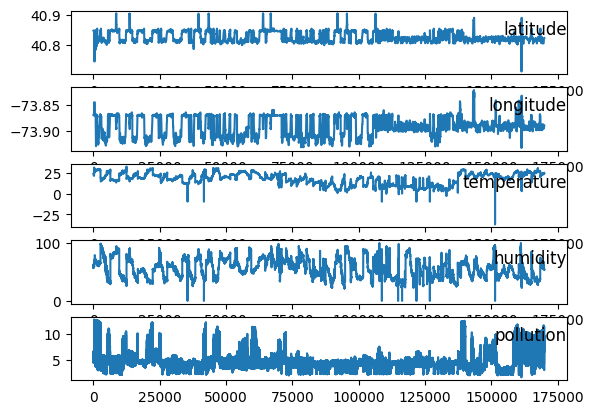

In [12]:
from pandas import read_csv
from matplotlib import pyplot

#we are reading our new dataframe
#header=0 means that the first row contains the column names and index_col=0 means that the first column is my indexing for my dataframe
dataset=read_csv("NYC_PM.csv", header=0, index_col=0)

# here we want to save all numerical values from our dataframe to the numpy array. every row of the dataframe will be a row in our array
#and each column in our dataframe will be a column in our array. Interesting

values=dataset.values

#we want to plot our columnss. we specify them
groups=[0,1,2,3,4]
#we are using matplotlib
i = 1
# plot each column
pyplot.figure()
for group in groups:
 pyplot.subplot(len(groups), 1, i)
 pyplot.plot(values[:, group])
 pyplot.title(dataset.columns[group], y=0.5, loc='right')
 i += 1
pyplot.show()


In [13]:
# we want to fit the lstm (long short term memory) to our data
from pandas import DataFrame
from pandas import read_csv
from pandas import concat
#Scikit learn is a machin learning library. LabelEncoder is a class that has some methods that one of them is a transforming
#the categorical data to numerical data (fit and transform method: mylabel=LabelEncoder()     mylabel.fit_transform(["cat", "dog","cat"]))
from sklearn.preprocessing import LabelEncoder
#MinMAxScaler transforms the data (for example two columns) to the number between 0 and 1  myminmax=MinMaxScaler()
#myminmax.fit_transform([[3,78],[4,34],[1,5]]) output:[[0.  0. ] [0.5 0.5] [1.  1. ]]

from sklearn.preprocessing import MinMaxScaler
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
# input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))# here cols will be a list of dataframes that each dataframe is the shifted i times down of the original dataframe, cols=[datafram after 5 times down, dataframe after 4 times doan ,..]
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    #print(names)# it shows that names is a list of strings which each one of them is a name of one column after shiftin that column
    #i time down ['var1(t-5)', 'var2(t-5)', 'var3(t-5)', 'var4(t-5)', 'var5(t-5)', 'var6(t-5)', 'var7(t-5)', 'var8(t-5)', 'var1(t-4)', 'var2(t-4)', 'var3(t-4)', 'var4(t-4)', 'var5(t-4)', 'var6(t-4)', 'var7(t-4)', 'var8(t-4)', 'var1(t-3)', 'var2(t-3)', 'var3(t-3)', 'var4(t-3)', 'var5(t-3)', 'var6(t-3)', 'var7(t-3)', 'var8(t-3)', 'var1(t-2)', 'var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)', 'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)']
#series_to_supervised(dataset,n_in=5,n_out=1,dropnan=True)
 # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))# here we shift i steps all the columns backword and then we append the new dataframe to cols
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]# here we are writing var1(t),var2(t) with the nmuber of our coleumns
            #print(names)

        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            #print(names)


#series_to_supervised(dataset,n_in=2,n_out=3,dropnan=True)# information with the lag 2 and output for the next 3 days
#['var1(t-2)', 'var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)', 'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)']
#['var1(t-2)', 'var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)', 'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)', 'var1(t+1)', 'var2(t+1)', 'var3(t+1)', 'var4(t+1)', 'var5(t+1)', 'var6(t+1)', 'var7(t+1)', 'var8(t+1)']
#['var1(t-2)', 'var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)', 'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)', 'var1(t+1)', 'var2(t+1)', 'var3(t+1)', 'var4(t+1)', 'var5(t+1)', 'var6(t+1)', 'var7(t+1)', 'var8(t+1)', 'var1(t+2)', 'var2(t+2)', 'var3(t+2)', 'var4(t+2)', 'var5(t+2)', 'var6(t+2)', 'var7(t+2)', 'var8(t+2)']

# put it all together
    agg = concat(cols, axis=1)# this is the last final dataframe that has all the columns with timing t-i and t+i
    agg.columns = names# naming the column names in the final dataframe
# drop rows with NaN values
    if dropnan:
          agg.dropna(inplace=True)
    return agg

data = read_csv('NYC_PM.csv', header=0, index_col=0)
values = dataset.values#The values array will be a 2D NumPy array where each row corresponds to a row in the DataFrame, and each column corresponds to a column in the DataFrame.
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])#After running this code, the original categorical values in the fifth column of the values array will be replaced with numerical representations
# ensure all data is float
values = values.astype('float32')#The line values = values.astype('float32') is converting the data type of all elements in the values array to float32.
#for h in range(5):# each element of values is a list in fact it is the raw of the original dataframe
#  print(values[h])

#[ 129.    -16.     -4.   1020.      2.      1.79    0.      0.  ]
#[ 148.    -15.     -4.   1020.      2.      2.68    0.      0.  ]
#[ 159.    -11.     -5.   1021.      2.      3.57    0.      0.  ]
#[ 1.810e+02 -7.000e+00 -5.000e+00  1.022e+03  2.000e+00  5.360e+00
 # 1.000e+00  0.000e+00]
#[ 138.     -7.     -5.   1022.      2.      6.25    2.      0.  ]

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1) # just will create the dataframe for our 8 variables at time t-1 and the dataframe for our 8 variables for time t
reframed.head()
      # drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)# from the outcome it needs the pullution column, so we delete the rest of the columns
print(reframed.head())
# as we can see we have 5 columns for input and one column for out put that is only our pollution

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1   0.705521   0.571594   0.874640      0.573   0.263095  0.705490
2   0.705490   0.571594   0.874640      0.578   0.348422  0.705399
3   0.705399   0.571228   0.874640      0.578   0.320904  0.705399
4   0.705399   0.571228   0.873199      0.576   0.263095  0.705399
5   0.705399   0.571228   0.873199      0.575   0.355319  0.705399


In [14]:
# split into train and test sets
#we are taking all the values from the dataframe:reframed into a 2 Dim Numpy array that list in that array row will be one row
#Each row is represented by an inner array, and the outer array holds the entire structure.It is like a matrix
...
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
#We are preparing the train data from the first year
train = values[:n_train_hours, :]
#we set the rest of indormation as a test
test = values[n_train_hours:, :]
# split into input and outputs
#train_X: we take all the rowsthar for one year and all the column var1,var2,until var 8 except the last column which will
#be our output:pollutin
#train_y takes all the raws for one year and only the column -1 which is the last column:pollution
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
# we know that each row of the train _X belongs to the information of 8 variable for one day of the year. now
#we want to relate it to 1=timestep. we have 3D array the first variable is the number of rows,
#the second the timestep and the last one is the number of columns
# Reshape input data to be 3D [samples, timesteps, features]


train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("Shape of train_X:", train_X.shape)

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


Shape of train_X: (8760, 1, 5)
(8760, 1, 5) (8760,) (161238, 1, 5) (161238,)


In [15]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Epoch 1/50
122/122 - 8s - loss: 0.1395 - val_loss: 0.0667 - 8s/epoch - 63ms/step
Epoch 2/50
122/122 - 5s - loss: 0.0631 - val_loss: 0.0597 - 5s/epoch - 45ms/step
Epoch 3/50
122/122 - 5s - loss: 0.0550 - val_loss: 0.0513 - 5s/epoch - 38ms/step
Epoch 4/50
122/122 - 4s - loss: 0.0508 - val_loss: 0.0575 - 4s/epoch - 31ms/step
Epoch 5/50
122/122 - 5s - loss: 0.0504 - val_loss: 0.0518 - 5s/epoch - 45ms/step
Epoch 6/50
122/122 - 5s - loss: 0.0464 - val_loss: 0.0584 - 5s/epoch - 45ms/step
Epoch 7/50
122/122 - 4s - loss: 0.0462 - val_loss: 0.0544 - 4s/epoch - 30ms/step
Epoch 8/50
122/122 - 5s - loss: 0.0428 - val_loss: 0.0474 - 5s/epoch - 45ms/step
Epoch 9/50
122/122 - 11s - loss: 0.0427 - val_loss: 0.0548 - 11s/epoch - 87ms/step
Epoch 10/50
122/122 - 5s - loss: 0.0430 - val_loss: 0.0425 - 5s/epoch - 45ms/step
Epoch 11/50
122/122 - 6s - loss: 0.0363 - val_loss: 0.0373 - 6s/epoch - 46ms/step
Epoch 12/50
122/122 - 4s - loss: 0.0339 - val_loss: 0.0302 - 4s/epoch - 31ms/step
Epoch 13/50
122/122 - 5

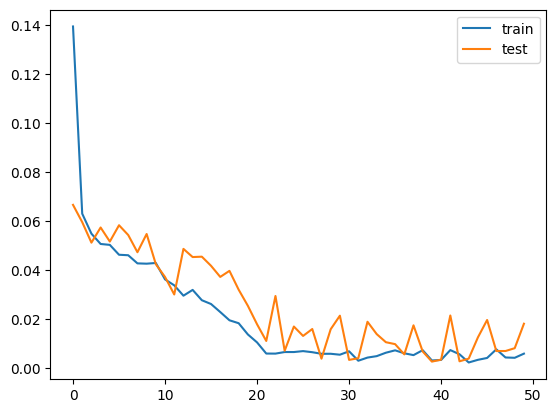

In [16]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [17]:
# make a prediction
#making predictions (yhat) using the trained model (model) on the test data (test_X).
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
#we combine the yhat with the original data from text_X and remove the first column
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# In the past we did two scalar on the text_X taht we convert the categorical variable to numbers and we ransform all the number between 0 and 1
# now we want to inverse them and get the original data
inv_yhat = scaler.inverse_transform(inv_yhat)
#we need all the raws and the first column which is yhat
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
# we are making sure that the test_y still has len(test_y) raws and 1 column which is pollution after the first year
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

5039/5039 [==============================] - 10s 2ms/step
Test RMSE: 0.004
